# Intro

**Aim**

- Information Theory
- Entropy, Cross Entropy, KL divergence

**contents**

- Information Content
- Entropy
- Kullback Leibler Divergence
- Cross Entropy Loss
- Decision Tree와 Entropy

# Information Content

- Information Theory: the mathematical treatment of the concepts, parameters and rules governing the transmission of messages through communication systems.

**How can we represent informations?**

Let's say that we have balls in each pockets.

![image](https://user-images.githubusercontent.com/78291267/154650257-a438253b-dcc1-4a48-96bf-ad389b3c7764.png)

The information we can get at left pocket is more than right pocket.

There are some conditions that we can get information quantitatively in [here](http://www.deeplearningbook.org/).

1. The higher possibility to happen, the lower information
2. If there are two independent cases, entire information is the sum of each information.

If we say that P(X=x) as possibility to happen event _x_, **Information content** _I(x)_ is like this.

![image](https://user-images.githubusercontent.com/78291267/154652563-6ef01e66-9f23-48a7-baad-52342c875886.png)

Commonly we set b 2, e, 10. If b = 2, then it's same with the number of bit to express the information.

![image](https://user-images.githubusercontent.com/78291267/154652853-4215a301-0126-4200-8458-c7b7d9e670c2.png)

This graph is $-log_eP(x)$.

Let's calculate the information of picking a red ball with code when we have n blue balls and one red ball.

In [1]:
import numpy as np
import math
import random

# 주머니 속에 들어있는 공의 개수입니다. 숫자를 바꾸면서 실험해보세요!
total = 1000

#---------------#

count = 1   # 실험이 끝날 때까지 꺼낸 공의 개수

# 1부터 total까지의 정수 중에서 하나를 뽑고 total과 같으면 실험 종료
# total=1000인 경우 1~999: blue / 1000: red
while True:
    sample = random.randrange(1,total+1)
    if sample == total:
        break
    count += 1

print('number of blue samples: '+str(count-1))
print('information content: '+str(-math.log(1/count)))

number of blue samples: 1044
information content: 6.951772164398911


# Entropy

As we saw just now, the information of event x is determined by the possibility of P(x).

![image](https://user-images.githubusercontent.com/78291267/154652563-6ef01e66-9f23-48a7-baad-52342c875886.png)

Information is about `one event`. **Then can we find the information when there are many cases?** Yes, that's **entropy**.

- Entropy: the average amount of information conveyed by an event, when considering all possible outcomes.

## For Discrete Random Variables

Let's say Discrete Random Variables _X_ has one of \*$x_1, x_2, x_3, ... , x_n$.

![image](https://user-images.githubusercontent.com/78291267/154654996-08905389-12ce-4bb6-8799-110c2184d765.png)

![image](https://user-images.githubusercontent.com/78291267/154659776-fa2c5c10-7d31-4610-9c8a-87790be3626b.png)

The more even cases we have, the higher entropy is.

This picture is entropy about the probability of getting front side of a coin. When it's **uniform distribution**, we get the maximum entropy.

![image](https://user-images.githubusercontent.com/78291267/154660763-e44f4290-a18c-4133-ad35-5a1e0569abbb.png)

## For Continuous Random Variables

We integrate them all instead of summing. We call this **differential entropy**.

![image](https://user-images.githubusercontent.com/78291267/154660975-1b424007-5853-4318-bd02-5bf68e412347.png)

# Kullback Leibler Divergence

The aim of machine learning is making the model close to the real random Variables. Discriminative model only train the decision boundary instead of modeling the distribution of real data. But generative model indirectly modeling the distribution of real data. So when we train `generative model`, we need a indicator which shows the difference between two data's random Variables distribution. **Kullback-Leiblr divergence** is the one of them.

Let's say P(x) as real random variables, Q(x) as random variables which model represents. The KL divergence can be defined with the difference between `the average of Q(x)'s information calculated by P(x)` and `the average of P(x)'s information calculated by P(x)`. It means that the change of entropy when you use approximate distribution Q(x) instead of using real distribution Q(x).

![image](https://user-images.githubusercontent.com/78291267/154838848-a3408247-e915-477d-a720-9afc264f3a71.png)

![image](https://user-images.githubusercontent.com/78291267/154838855-fd00ef79-8057-451f-94d1-ecbc5ee4c4ee.png)

KL divergence has similar property with distance function, but as KL divergence has the random distribution which can be a standard,
$D_KL(P||Q)$ and $D_KL(Q||P)$ are not equal.

**Propeties**

![image](https://user-images.githubusercontent.com/78291267/154839244-e48f6322-5cc1-4e71-add9-e8c2b2c729a0.png)

In machine learning, we have to minimize the value of $D_KL(P||Q)$.

![image](https://user-images.githubusercontent.com/78291267/154839252-09f567d7-b515-4fa0-9fae-9a1c1e5410b1.png)

We cannot change the blue term because it's the real distribution of data. The part that we can change is red term, so this part is the **cross entropy** of Q(x) by P(x).

## Cross Entropy

![image](https://user-images.githubusercontent.com/78291267/154839447-fc184e65-923d-4a57-9bfd-2033c4e724a2.png)

Then we can get an equation like this. Now we found that `minimizing the KL divergence` and `minimizing the Cross Entropy` are the same mathematically.

# Cross Entropy Loss

## Cross Entropy Loss

Let's see the Cross entropy equation first.

![image](https://user-images.githubusercontent.com/78291267/154839992-b9ca3327-701a-4f5f-82fa-06893b5ab82d.png)

Let's try with codes.



In [1]:
import numpy as np
import random

# generate random output
#-----------------#
# can be modified
class_num = 4
#-----------------#
q_vector = []
total = 11

for i in range(class_num-1):
    q = random.uniform(0,total)
    q_vector.append(round(q,3))
    total = total - q

q_vector.append(total)
softmax_output = np.array(q_vector)

print(softmax_output)

[0.447      0.477      0.014      0.06205713]


In [3]:
# Cross Entropy

#-----------------#
# can be modified
class_index = 1
#-----------------#

p_vector = np.zeros(class_num)
p_vector[class_index-1] = 1

cross_entropy = -np.sum(np.multiply(p_vector, np.log(softmax_output)))

print('model prediction: '+str(softmax_output))
print('data label: '+str(p_vector))
print('cross entropy: '+str(round(cross_entropy,4)))

model prediction: [0.447      0.477      0.014      0.06205713]
data label: [1. 0. 0. 0.]
cross entropy: 0.8052



## Cross Entropy and Likelihood

When we set the parameter of model as $\theta$, the distribution which model represents is $Q(y|X,\theta)$ and real distribution of data will be $Q(y|X)$. However,$Q(y|X,\theta)$ means the distribution of prediction when dataset and parameter are given, so it is exactly same with the Likelihood.

![image](https://user-images.githubusercontent.com/78291267/154840295-2385c14b-f787-43aa-98d7-760b84d4fcac.png)

We only can change the **log part**, so minimizing the cross entropy is same with minimizing the `negative log likelihood`.

# Decision Tree and Entropy

Decision Tree is a view lowering entropy is getting **information gain** when we compare the entropy by splitting a dataset by some standards.

![image](https://user-images.githubusercontent.com/78291267/154840718-5389afac-1fb4-493e-959e-99a7dfb54484.png)

- S: a set of entire event
- F: a set of features by some standards
- $f \in F$: _f_ is a feature concluded in F
- $S_f$: a set of S which has feature _f_
- |X|: size of set X(= number of elements)
- e(X): entropy which a event set X has

Let's try with codes.

In [4]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [5]:
import os
csv_path = os.getenv('HOME')+'/aiffel/information_theory/diabetes.csv'

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
df = pd.read_csv(csv_path, header=0, names=col_names)
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# 데이터셋 준비
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
X = df[feature_cols] # Features
y = df.label # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print('슝=3')

슝=3


In [7]:
# Decision Tree  모델 학습
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6753246753246753


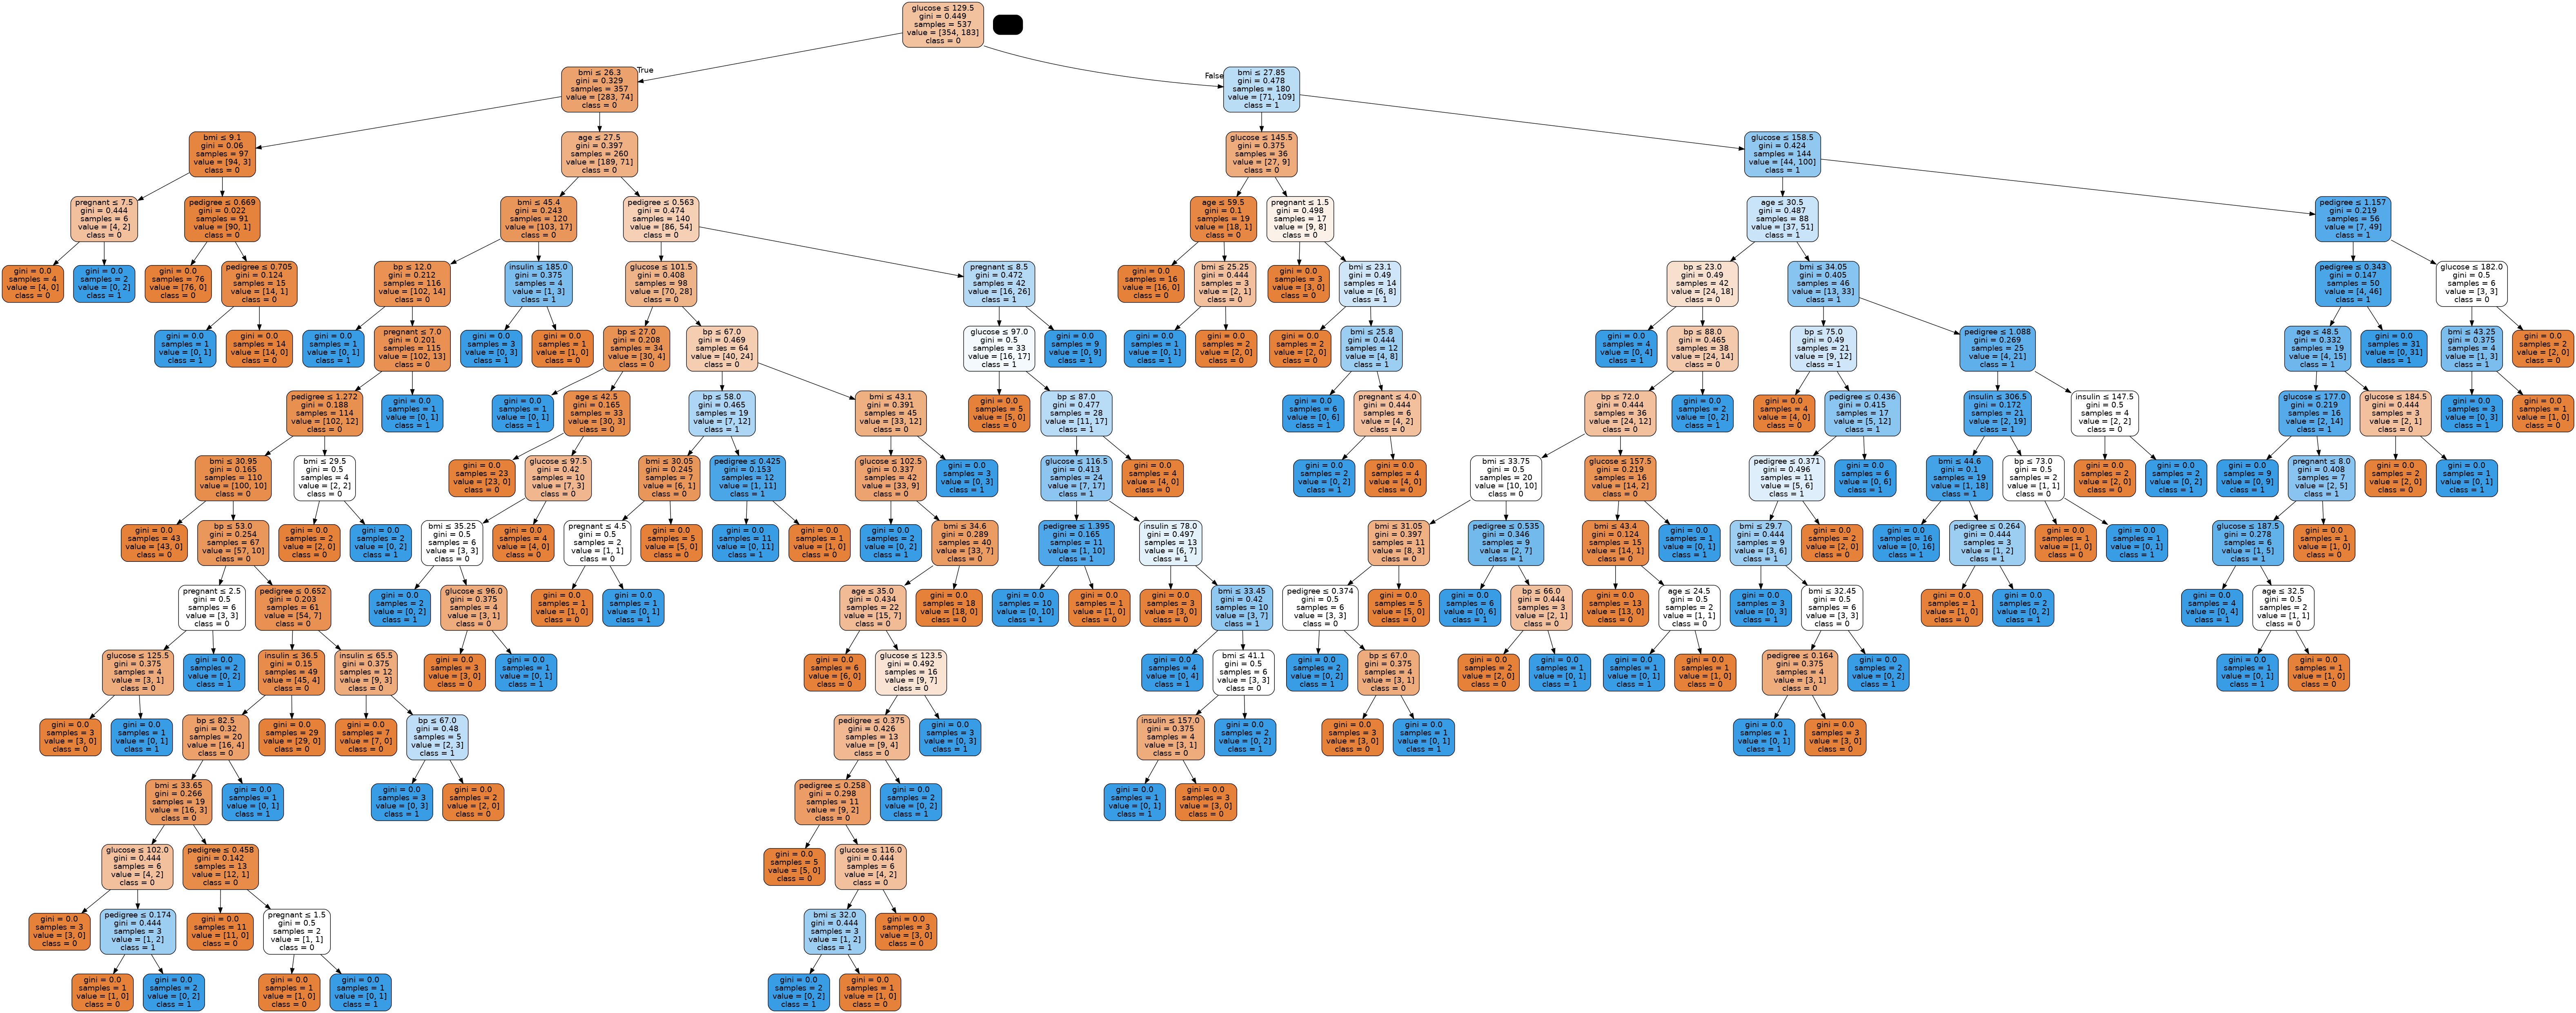

In [8]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True, 
                feature_names=feature_cols, 
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes1.png')
Image(graph.create_png(), retina=True)

In [9]:
# 정보 이득이 되지 않고 남은 Impurity  총량 측정
ccp_path1 = clf.cost_complexity_pruning_path(X_train,y_train)
ccp_path2 = clf.cost_complexity_pruning_path(X_test,y_test)
print(np.mean(ccp_path1.impurities))
print(np.mean(ccp_path2.impurities))

0.15538793631294812
0.14933968140533083


In [10]:
# change the depth to 3


clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


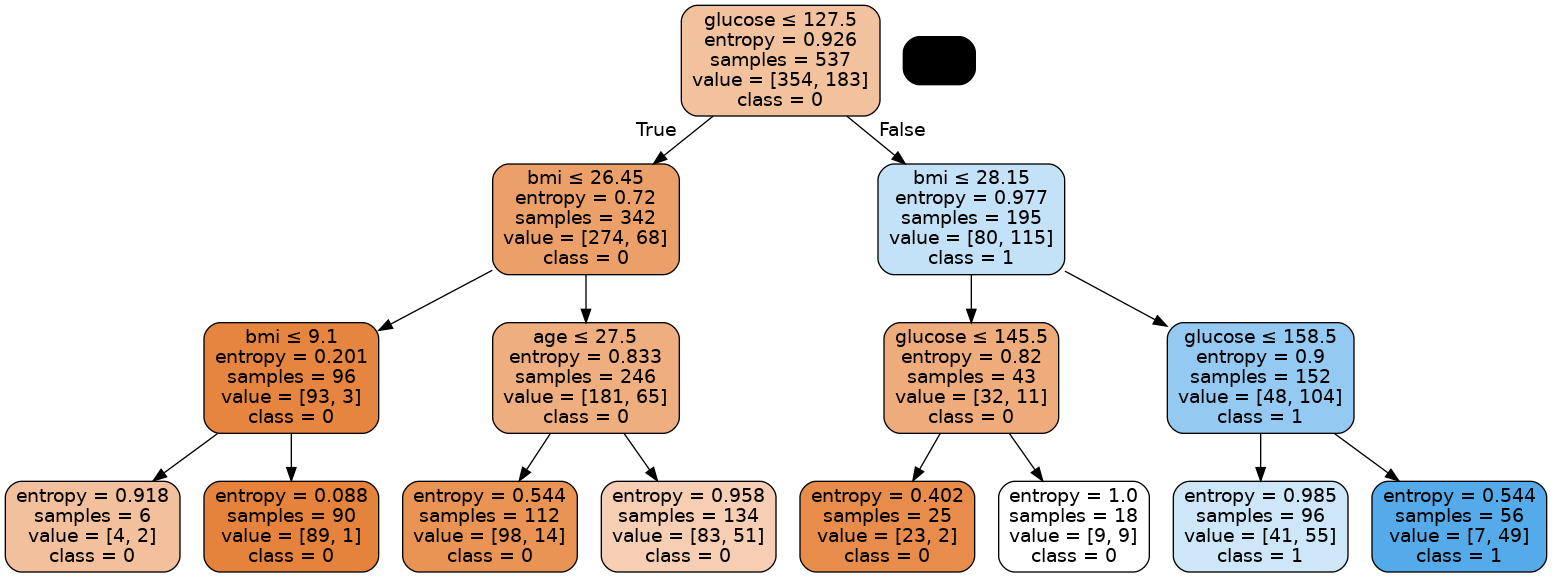

In [11]:
dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes2.png')
Image(graph.create_png(), retina=True)

In [12]:
# 정보이득이 되지 않고 남은 Impurity  총량 측정
ccp_path1 = clf.cost_complexity_pruning_path(X_train,y_train)
ccp_path2 = clf.cost_complexity_pruning_path(X_test,y_test)
print(np.mean(ccp_path1.impurities))
print(np.mean(ccp_path2.impurities))

0.7474881472739515
0.6878691771636323
